In [1]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


# Here we look into our testing dataset 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json


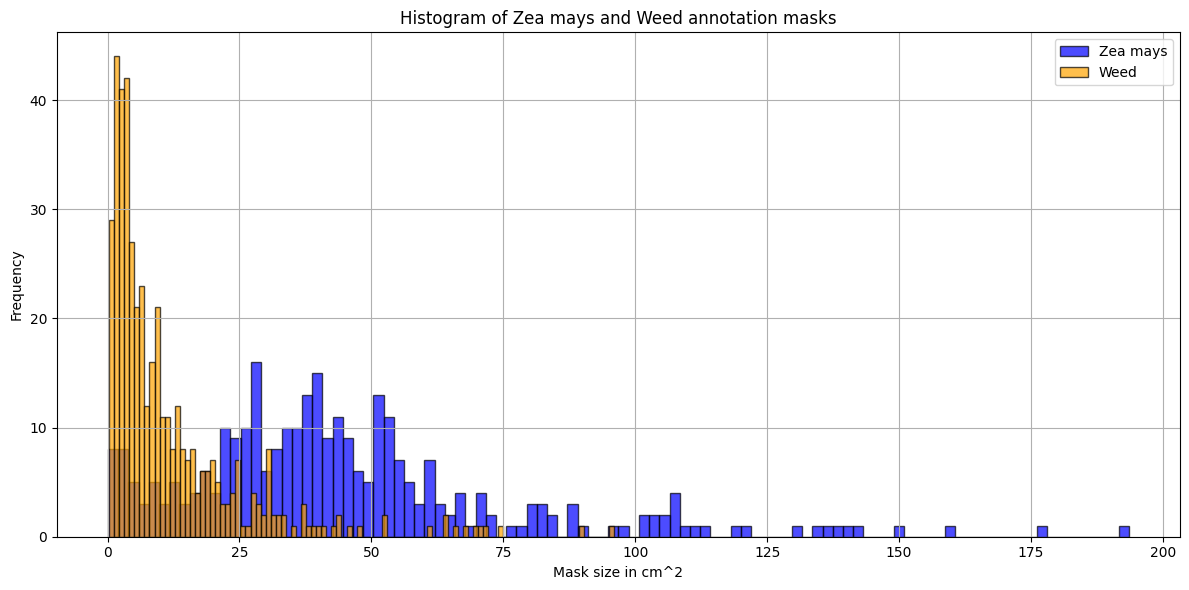

In [3]:
# Before runing this notebook make sure to have the "1x_statistics.csv" in the same dir. If not then run "report_statistics.ipynb"

# Load the data from your local CSV file
df = pd.read_csv('/home/fatbardhf/SuperResolution_for_in-field_weed_images/reports/bicubical_1x-20x__resnet34/1x_statistics.csv')

# Convert 'Mask_class_1' and 'Mask_class_2' columns to numeric values
df['Mask_class_1'] = pd.to_numeric(df['Mask_class_1'], errors='coerce')
df['Mask_class_2'] = pd.to_numeric(df['Mask_class_2'], errors='coerce')

# Filter rows where Mask_class_1 or Mask_class_2 is not equal to 0
df_filtered_1 = df[df['Mask_class_1'] != 0]
df_filtered_2 = df[df['Mask_class_2'] != 0]

# Extract the Mask_class_1 and Mask_class_2 column values from the filtered DataFrame
mask_class_1 = df_filtered_1['Mask_class_1'] * 0.0049  # Zea mays
mask_class_2 = df_filtered_2['Mask_class_2'] * 0.0049  # Weed

# Create a single figure for both histograms
plt.figure(figsize=(12, 6))

# Plot Zea mays (Maize) histogram in blue
plt.hist(mask_class_1, bins=100, color='blue', edgecolor='black', alpha=0.7, label='Zea mays')

# Plot Weed histogram in orange
plt.hist(mask_class_2, bins=100, color='orange', edgecolor='black', alpha=0.7, label='Weed')

# Set labels and title
plt.xlabel('Mask size in cm^2')
plt.ylabel('Frequency')
plt.title('Histogram of Zea mays and Weed annotation masks')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Histogram that shows mask sizes for our 2 classes

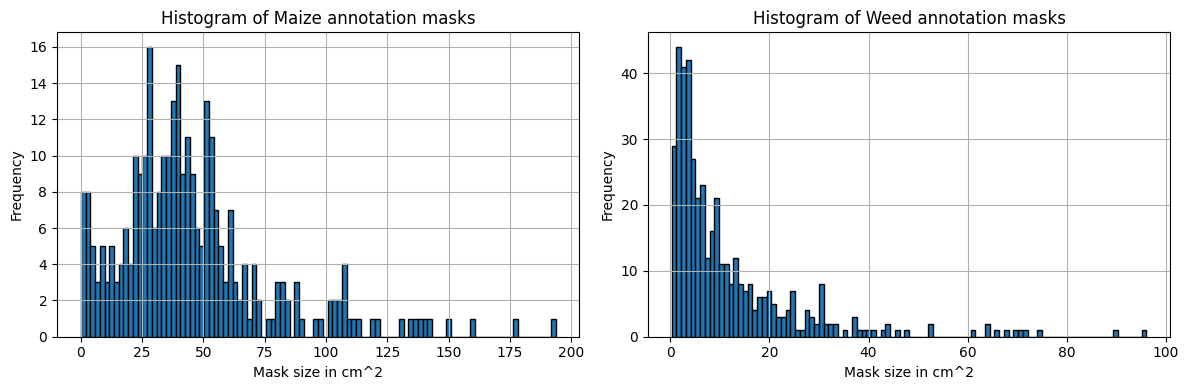

In [6]:
# Read the CSV file
df = pd.read_csv('/home/fatbardhf/SuperResolution_for_in-field_weed_images/reports/bicubical_1x-20x__resnet34/1x_statistics.csv')

# Convert 'Mask_class_1' and 'Mask_class_2' columns to numeric values
df['Mask_class_1'] = pd.to_numeric(df['Mask_class_1'], errors='coerce')
df['Mask_class_2'] = pd.to_numeric(df['Mask_class_2'], errors='coerce')

# Filter rows where Mask_class_1 or Mask_class_2 is not equal to 0
df_filtered_1 = df[(df['Mask_class_1'] != 0)]
df_filtered_2 = df[(df['Mask_class_2'] != 0)]

# Extract the Mask_class_1 and Mask_class_2 column values from the filtered DataFrame
mask_class_1 = df_filtered_1['Mask_class_1'] * 0.0049
mask_class_2 = df_filtered_2['Mask_class_2'] * 0.0049

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot Mask_class_1 histogram
counts1, bins1, _ = ax1.hist(mask_class_1, bins=100, edgecolor='black')
ax1.set_xlabel('Mask size in cm^2')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Maize annotation masks')
ax1.grid(True)

# Plot Mask_class_2 histogram
counts2, bins2, _ = ax2.hist(mask_class_2, bins=100, edgecolor='black')
ax2.set_xlabel('Mask size in cm^2')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Weed annotation masks')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Save histogram_data1 to CSV
histogram_data1 = []
for i in range(len(bins1) - 1):
    a = round(bins1[i], 3)
    b = round(bins1[i + 1], 3)
    c = counts1[i]
    if c != 0:
        histogram_data1.append({'Bin': f"[{a} - {b}]", 'Count': c})

histogram_df1 = pd.DataFrame(histogram_data1)
histogram_df1.to_csv('histogram_mask_class_1.csv', index=False)

# Save histogram_data2 to CSV
histogram_data2 = []
for i in range(len(bins2) - 1):
    a = round(bins2[i], 3)
    b = round(bins2[i + 1], 3)
    c = counts2[i]
    if c != 0:
        histogram_data2.append({'Bin': f"[{a} - {b}]", 'Count': c})

histogram_df2 = pd.DataFrame(histogram_data2)
histogram_df2.to_csv('histogram_mask_class_2.csv', index=False)

### Here we define the size of our groups and divide patch names based on those groups

In [7]:
import pandas as pd

# Define the bin ranges for grouping
bins_1 = [0, 25, 100, 300]
bins_2 = [0, 10, 40, 140]

# Read the CSV file
df = pd.read_csv('/home/fatbardhf/SuperResolution_for_in-field_weed_images/reports/bicubical_1x-20x__resnet34/1x_statistics.csv')

# Convert 'Mask_class_1' and 'Mask_class_2' columns to numeric values
df['Mask_class_1'] = pd.to_numeric(df['Mask_class_1'], errors='coerce')
df['Mask_class_2'] = pd.to_numeric(df['Mask_class_2'], errors='coerce')

# Filter rows where Mask_class_1 or Mask_class_2 is not equal to 0
df_filtered_1 = df[df['Mask_class_1'] != 0]
df_filtered_2 = df[df['Mask_class_2'] != 0]

# Extract the Mask_class_1 and Mask_class_2 column values from the filtered DataFrame
mask_class_1 = df_filtered_1['Mask_class_1'] * 0.0049
mask_class_2 = df_filtered_2['Mask_class_2'] * 0.0049

# Group patch names based on bins_1 and create a DataFrame
groups_1 = pd.cut(mask_class_1, bins=bins_1, labels=["1", "2", "3"])
grouped_df_1 = pd.DataFrame({'patch name': df_filtered_1['patch name'], 'Group': groups_1})

# Group patch names based on bins_2 and create a DataFrame
groups_2 = pd.cut(mask_class_2, bins=bins_2, labels=["1", "2", "3"])
grouped_df_2 = pd.DataFrame({'patch name': df_filtered_2['patch name'], 'Group': groups_2})

# Save the grouped DataFrames to CSV files
grouped_df_1.to_csv('groups_mask_class_1.csv', index=False)
grouped_df_2.to_csv('groups_mask_class_2.csv', index=False)

### Plot the groups sizes

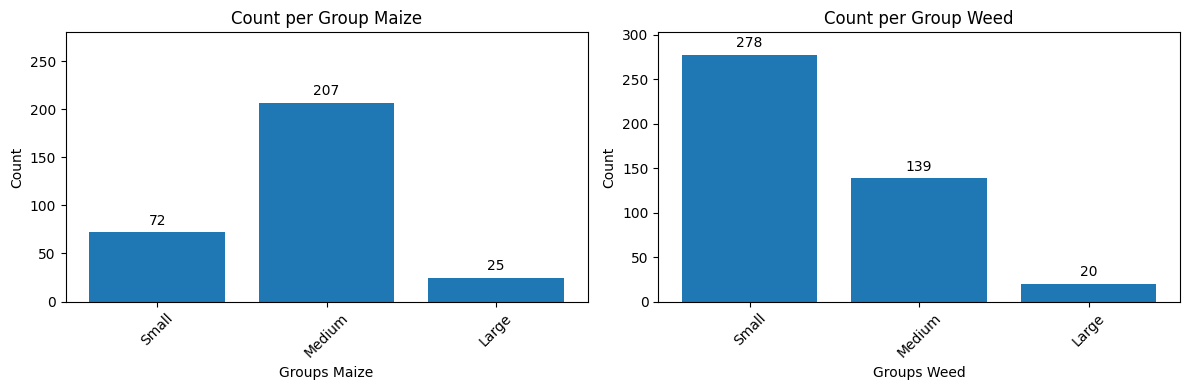

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
grouped_data_1 = pd.read_csv('groups_mask_class_1.csv')
grouped_data_2 = pd.read_csv('groups_mask_class_2.csv')

# Count the occurrences of each key type
counts_1 = grouped_data_1['Group'].value_counts().sort_index()
counts_2 = grouped_data_2['Group'].value_counts().sort_index()

# Mapping of old x-axis values to new labels
labels_map = {1: 'Small', 2: 'Medium', 3: 'Large'}

# Calculate the maximum y-value across both datasets
max_y = max(counts_1.max(), counts_2.max())

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the counts for Mask_class_1
bars1 = ax1.bar(counts_1.index.map(labels_map), counts_1.values)
ax1.set_xlabel('Groups Maize')
ax1.set_ylabel('Count')
ax1.set_title('Count per Group Maize')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, max_y + 2)  # Set y-axis limit

# Add counts above bars for Mask_class_1
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

# Plot the counts for Mask_class_2
bars2 = ax2.bar(counts_2.index.map(labels_map), counts_2.values)
ax2.set_xlabel('Groups Weed')
ax2.set_ylabel('Count')
ax2.set_title('Count per Group Weed')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(0, max_y + 25)  # Set y-axis limit

# Add counts above bars for Mask_class_2
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()
